In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player  Nation    Pos  \
0              0     Theo Hernández  fr FRA     DF   
1              1    Marcel Sabitzer  at AUT     MF   
2              2   Dejan Kulusevski  se SWE  MF,FW   
3              3      Julian Brandt  de GER  FW,MF   
4              4  Nikola Milenković  rs SRB     DF   
...          ...                ...     ...    ...   
1507        2504   Souleymane Touré  fr FRA     DF   
1508        2506        Jere Uronen  fi FIN     DF   
1509        2507         Yan Valery  tn TUN     DF   
1510        2513            Vitinha  pt POR     MF   
1511        2518  Alessandro Zanoli  it ITA     DF   

                                                  Squad  \
0                                                 Milan   
1     RB Leipzig+RB Leipzig+Bayern Munich+Manchester...   
2                           Juventus+Tottenham+Juventus   
3                                              Dortmund   
4                                            Fiorentina   
...                                                 ...   
1507                                  Marseille+Auxerre   
1508                                   Brest+Schalke 04   
1509                                 Southampton+Angers   
1510                                Marseille+Paris S-G   
1511                                   Sampdoria+Napoli   

                                                Comp   Age    Born     MP  \
0                                         it Serie A  25.0  1997.0   97.0   
1     de Bundesliga+eng Premier League+de Bundesliga  29.0  1994.0   80.0   
2           it Serie A+eng Premier League+it Serie A  23.0  2000.0  103.0   
3                                      de Bundesliga  27.0  1996.0   94.0   
4                                         it Serie A  25.0  1997.0   95.0   
...                                              ...   ...     ...    ...   
1507                                      fr Ligue 1  19.0  2003.0   24.0   
1508                        fr Ligue 1+de Bundesliga  28.0  1994.0   17.0   
1509                   eng Premier League+fr Ligue 1  23.0  1999.0   31.0   
1510                                      fr Ligue 1  22.0  2000.0   50.0   
1511                                      it Serie A  21.0  2000.0   23.0   

      Starts      Min   90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0       95.0     8415  93.5         0.17       0.31        0.15          0.29   
1       46.0    53186  47.1         0.21       0.34        0.13          0.25   
2       61.0  1265762  67.0         0.18       0.49        0.18          0.49   
3       68.0     5970  66.3         0.32       0.59        0.32          0.59   
4       91.0     8097  89.9         0.07       0.09        0.07          0.09   
...      ...      ...   ...          ...        ...         ...           ...   
1507    18.0     1656  18.4         0.05       0.05        0.05          0.05   
1508    12.0      976  10.8         0.00       0.09        0.00          0.09   
1509    31.0     2542  28.2         0.00       0.00        0.00          0.00   
1510    34.0     2910  32.4         0.12       0.22        0.12          0.22   
1511    16.0     1552  17.2         0.12       0.29        0.12          0.29   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.13          0.28        0.11            0.26               272.0   
1         0.25          0.31        0.17            0.25                38.0   
2         0.15          0.36        0.15            0.36               260.0   
3         0.18          0.43        0.18            0.43               185.0   
4         0.09          0.10        0.09            0.10                13.0   
...        ...           ...         ...             ...                 ...   
1507      0.08          0.02        0.08            0.02                19.0   
1508      0.01          0.13        0.01            0.13                12.0   
1509      0.03          0.07  

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0             Player   Nation    Pos                  Squad  \
0              0         Max Aarons  eng ENG     DF            Bournemouth   
1              1   Brenden Aaronson   us USA  MF,FW           Union Berlin   
2              4   Yunis Abdelhamid   ma MAR     DF                  Reims   
3              5  Salis Abdul Samed   gh GHA     MF                   Lens   
4              7    Laurent Abergel   fr FRA     MF                Lorient   
...          ...                ...      ...    ...                    ...   
1493         134  Alessandro Zanoli   it ITA  DF,FW     Salernitana+Napoli   
1494         135       Duván Zapata   co COL     FW        Torino+Atalanta   
1495         136     Bryan Zaragoza   es ESP  FW,MF  Granada+Bayern Munich   
1496         138       Nadir Zortea   it ITA     DF     Frosinone+Atalanta   
1497         139        Milan Đurić   ba BIH     FW    Hellas Verona+Monza   

                          Comp  Age    Born  MP  Starts   Min   90s  \
0           eng Premier League  0.0  2000.0  20      13  1237  13.7   
1                de Bundesliga  0.0  2000.0  30      14  1267  14.1   
2                   fr Ligue 1  0.0  1987.0  31      31  2781  30.9   
3                   fr Ligue 1  0.0  2000.0  27      17  1519  16.9   
4                   fr Ligue 1  0.0  1993.0  33      32  2860  31.8   
...                        ...  ...     ...  ..     ...   ...   ...   
1493                it Serie A  0.0  2000.0  21      10   973  10.8   
1494                it Serie A  0.0  1991.0  37      36  2992  33.2   
1495  es La Liga+de Bundesliga  0.0  2001.0  28      19  1821  20.2   
1496                it Serie A  0.0  1999.0  19      14  1407  15.7   
1497                it Serie A  0.0  1990.0  37      26  2461  27.4   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.00       0.07        0.00          0.07      0.00   
1            0.14       0.28        0.14          0.28      0.14   
2            0.13       0.13        0.10          0.10      0.11   
3            0.00       0.00        0.00          0.00      0.05   
4            0.06       0.09        0.06          0.09      0.04   
...           ...        ...         ...           ...       ...   
1493         0.00       0.19        0.00          0.19      0.02   
1494         0.39       0.51        0.39          0.51      0.34   
1495         0.30       0.40        0.25          0.35      0.21   
1496         0.13       0.45        0.13          0.45      0.03   
1497         0.33       0.40        0.29          0.36      0.27   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.06        0.00            0.06                34.0   
1             0.27        0.14            0.27                77.0   
2             0.12        0.09            0.09                15.0   
3             0.08        0.05            0.08                19.0   
4             0.10        0.04            0.10                65.0   
...            ...         ...             ...                 ...   
1493          0.02        0.02            0.02                26.0   
1494          0.44        0.34            0.44               114.0   
1495          0.32        0.17            0.27               145.0   
1496          0.19        0.03            0.19                52.0   
1497          0.39        0.19            0.21                 7.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0              14.0            41.2              12.0               35.3   
1              34.0            44.2              41.0               53.2   
2               8.0            53.3               7.0               46.7   
3               7.0            36.8              11.0               57.9   
4              44.0            67.7              18.0               27.7   
...             ...             ...               ...                ...   
1493            6.0       

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
newbie = newbie[newbie['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW', 'FW,MF','MF,FW'])]
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)



In [6]:
Alvarez_2024=player_2024[player_2024['Player']=='Julián Álvarez']
Alvarez_2024

Unnamed: 0          Player  Nation    Pos            Squad  \
15          88  Julián Álvarez  ar ARG  MF,FW  Manchester City   

                  Comp  Age    Born  MP  Starts   Min   90s  Goals_per90  \
15  eng Premier League  0.0  2000.0  36      31  2647  29.4         0.37   

    G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
15       0.65        0.31          0.58      0.44          0.66        0.39   

    npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
15            0.61                42.0           20.0            47.6   

    Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
15              22.0               52.4           52.86   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
15                    0.68                    3.64                   16.09   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
15                   33.61                    5.07                      52.79   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
15                       1.43                  0.68                     0.75   

    Carries_per_90  Total_Distance_per_90  \
15           31.09                 151.67   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
15                                71.16                        2.18   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
15                2.01                         0.95                 1.9   

    Dispossessed_per_90  Passes_Received_per_90  \
15                 1.22                   37.52   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
15                                6.12                        4.01   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
15                     0.51                   2.52                   0.95   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
15                  0.14              0.34                     0.07   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
15                    0.0                   0.41                   0.03   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
15                   0.0               0.0                     0.07   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
15                    0.0            1011.0            1258.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
15               80.4         13977.0          2992.0             615.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
15             679.0               90.6              272.0              328.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
15                82.9             58.0            145.0              40.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
15            0.27        0.22       0.21          0.05               2.28   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
15               1.46                        1.39   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
15                         0.14                        3.5   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
15                    42.79                    36.36                     6.29   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
15                     0.85                  0.31             0.03   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
15            4.66                    0.24                 4.39   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
15                     1.5                     1.22                     0.07   



In [7]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
alvarez_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[88]],0)

# Print the percentile ranks for Declan Rice
print(alvarez_2024_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
88         10.0       36.0        13.0          41.0      16.0          33.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
88        20.0            37.0                64.0           52.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
88            15.0              69.0               77.0            77.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
88                    17.0                    70.0                    75.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
88                    77.0                    75.0                       77.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
88                       91.0                  79.0                     96.0   

    Carries_per_90  Total_Distance_per_90  \
88            87.0     

In [8]:
# Extract the percentile ranks, transpose, and sort them in descending order
alvarez_2024_percentile_ranks_sorted = alvarez_2024_percentile_ranks.T.sort_values(by=88, ascending=False)

# Get the top 20 parameters
top_30_params = alvarez_2024_percentile_ranks.index[:30]
top_30_params_values = alvarez_2024_percentile_ranks_sorted[88].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index([88], dtype='int64')
Values:
Through_Balls_per_90                   97.0
Take_Ons_Shot_per_90                   97.0
Progressive_Passes_Received_per_90     97.0
Tackled_Take_Ons_per_90                96.0
Take_Ons_Attempted_per_90              91.0
Passes_Penalty_Area_per_90             91.0
Pass_Live_Goal_per_90                  90.0
Carries_Penalty_Area_per_90            90.0
Shot-Shot_per_90                       90.0
Progressive_Carries_per_90             89.0
Ball_Recoveries_per_90                 88.0
Goal_Creating_Action_90                88.0
Carries_per_90                         87.0
xA_per_90                              87.0
Shot_Goal_per_90                       86.0
Shot_Creating_Action_per90             86.0
Take_Ons_Goal_per_90                   85.0
Assists_per_90                         85.0
Progressive_Passes_per_90              84.0
Progressive_Distance_Carried_per_90    84.0
Pass_Live_Shot_per_90                  83.0
Throw_Ins_Taken_per_90

In [9]:
import pandas as pd




params = [
    'Through_Balls_per_90',
    'Take_Ons_Shot_per_90',
    'Progressive_Passes_Received_per_90',
    'Tackled_Take_Ons_per_90',
    'Take_Ons_Attempted_per_90',
    'Passes_Penalty_Area_per_90',
    'Pass_Live_Goal_per_90',
    'Carries_Penalty_Area_per_90',
    'Shot-Shot_per_90',
    'Progressive_Carries_per_90',
    'Ball_Recoveries_per_90',
    'Goal_Creating_Action_90',
    'Carries_per_90',
    'xA_per_90',
    'Shot_Goal_per_90'
]



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[88]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Through_Balls_per_90  Take_Ons_Shot_per_90  \
88                  97.0                  97.0   

    Progressive_Passes_Received_per_90  Tackled_Take_Ons_per_90  \
88                                97.0                     96.0   

    Take_Ons_Attempted_per_90  Passes_Penalty_Area_per_90  \
88                       91.0                        91.0   

    Pass_Live_Goal_per_90  Carries_Penalty_Area_per_90  Shot-Shot_per_90  \
88                   90.0                         90.0              90.0   

    Progressive_Carries_per_90  Ball_Recoveries_per_90  \
88                        89.0                    88.0   

    Goal_Creating_Action_90  Carries_per_90  xA_per_90  Shot_Goal_per_90  
88                     88.0            87.0       87.0              86.0  


In [10]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[97.0,
 97.0,
 97.0,
 96.0,
 91.0,
 91.0,
 90.0,
 90.0,
 90.0,
 89.0,
 88.0,
 88.0,
 87.0,
 87.0,
 86.0]

In [11]:
image_path = "Alvarez.png"
fdj_cropped = Image.open(image_path)


In [12]:
split_params = [param.replace('_', '\n') for param in params]


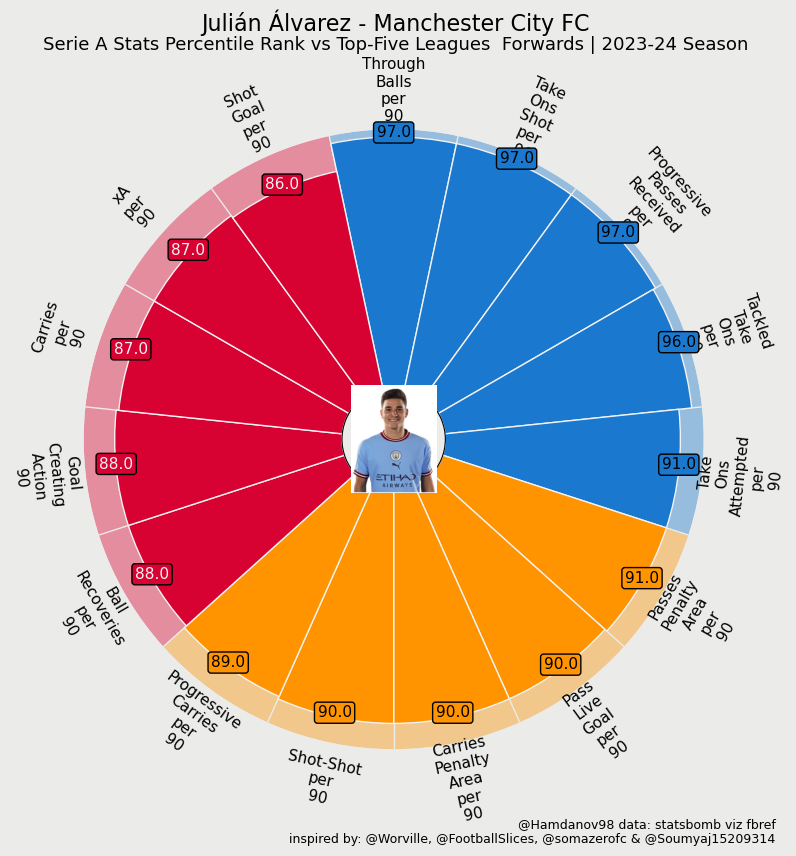

In [13]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Julián Álvarez - Manchester City FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues  Forwards | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Alvarez_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]

In [15]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [16]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [17]:
# Get de Ligt's row and compute cosine similarity
deligt_index = player_2024.index[player_2024['Player'] == 'Julián Álvarez'][0]
deligt_data = transformed_df.loc[deligt_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=deligt_index)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, deligt_data).flatten()
transformed_df['similarity_to_alvarez_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_alvarez_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [19]:
# Visualize the results
player_2024['similarity_to_alvarez_2024'] = transformed_df['similarity_to_alvarez_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_alvarez_2024', ascending=False)
player_2024_sorted

Unnamed: 0                          Player   Nation    Pos  \
272        1829                   Thomas Müller   de GER  MF,FW   
154        1034               Antoine Griezmann   fr FRA  FW,MF   
27          149                      Iago Aspas   es ESP     FW   
410        2772                    Harry Wilson  wls WAL     FW   
347        2358                   Pablo Sarabia   es ESP  MF,FW   
47          273               Wissam Ben Yedder   fr FRA     FW   
391        2657                     Deniz Undav   de GER  FW,MF   
331        2217                      Marco Reus   de GER  MF,FW   
364        2482                  Florian Sotoca   fr FRA  MF,FW   
209        1383                 Andrej Kramarić   hr CRO  MF,FW   
256        1722                    Brais Méndez   es ESP  MF,FW   
390        2643                Viktor Tsyhankov   ua UKR  MF,FW   
60          360             Benjamin Bourigeaud   fr FRA  MF,FW   
314        2136                   Alassane Pléa   fr FRA  FW,MF   
408        2769                         Willian   br BRA     FW   
33          181                      Alex Baena   es ESP  MF,FW   
120         808                  Harvey Elliott  eng ENG  MF,FW   
454         105                           Portu   es ESP  MF,FW   
433          29                    Fares Chaïbi   dz ALG  MF,FW   
351        2372               Gianluca Scamacca   it ITA     FW   
381        2591                 Youri Tielemans   be BEL  MF,FW   
113         777                  Marvin Ducksch   de GER     FW   
130         861                 Bruno Fernandes   pt POR  MF,FW   
371        2527                            Suso   es ESP  MF,FW   
386        2612                   Ferrán Torres   es ESP     FW   
50          287         Jóhann Berg Guðmundsson   is ISL  MF,FW   
448          87                     Neal Maupay   fr FRA     FW   
323        2193                        Raphinha   br BRA  FW,MF   
131         885                      Phil Foden  eng ENG  FW,MF   
77          447                Antonio Candreva   it ITA  MF,FW   
26          145                   Marco Asensio   es ESP  MF,FW   
168        1107                     Kai Havertz   de GER  MF,FW   
48          283                Domenico Berardi   it ITA     FW   
315        2140                 Matteo Politano   it ITA     FW   
417        2796                    Yusuf Yazıcı   tr TUR  MF,FW   
290        1925                    Darwin Núñez   uy URU     FW   
102         689                    Moussa Diaby   fr FRA  FW,MF   
159        1063                 Serhou Guirassy   gn GUI     FW   
115         787                    Paulo Dybala   ar ARG  FW,MF   
305        2065                           Pedri   es ESP  MF,FW   
170        1138                   Son Heung-min   kr KOR     FW   
377        2574                  Martin Terrier   fr FRA  FW,MF   
127         853                     Nabil Fekir   fr FRA  MF,FW   
226        1471              Robert Lewandowski   pl POL     FW   
249        1694                    Bryan Mbeumo   cm CMR     FW   
145         988               Aleksandr Golovin   ru RUS  MF,FW   
379        2589                   Marcus Thuram   fr FRA     FW   
199        1297                      Harry Kane  eng ENG     FW   
303        2036                   Lucas Paquetá   br BRA  FW,MF   
267        1803                   Gerard Moreno   es ESP     FW   
395        2674                    Ruben Vargas   ch SUI  MF,FW   
64          371                   Julian Brandt   de GER  MF,FW   
343        2315                   Mohamed Salah   eg EGY     FW   
316        2149                  Yussuf Poulsen   dk DEN     FW   
9            55               Maghnes Akliouche   fr FRA  MF,FW   
326        2197               Giacomo Raspadori   it ITA  FW,MF   
200        1298                     Lee Kang-in   kr KOR  FW,MF   
143         972              Morgan Gibbs-White  eng ENG  MF,FW   
251        1702                     John McGinn  sct

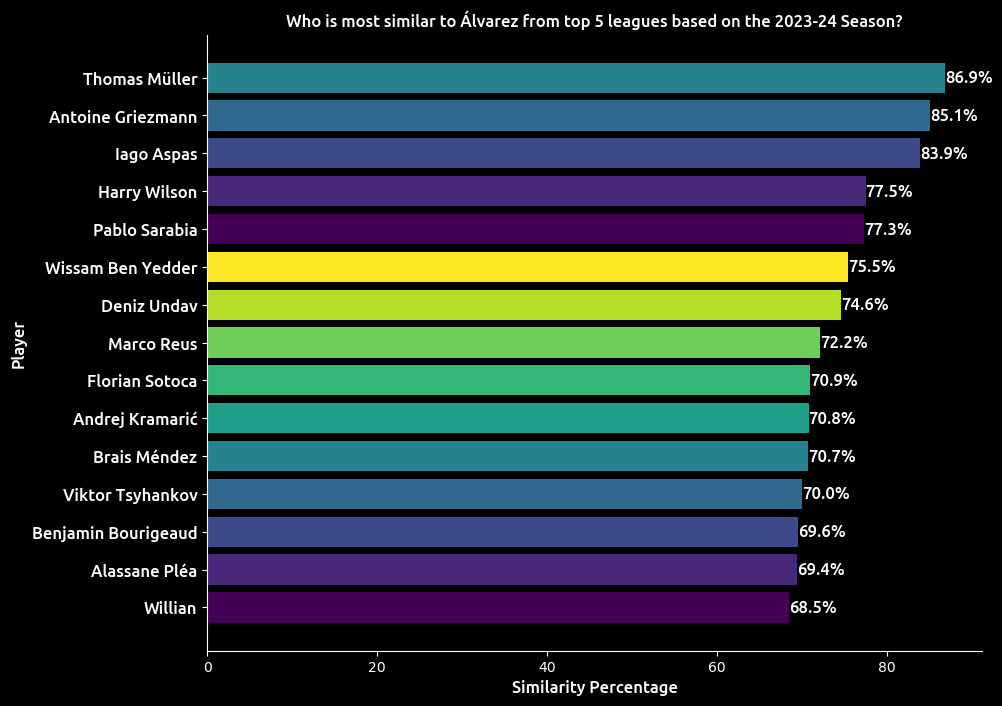

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_alvarez_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_alvarez_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Álvarez from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
